In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('android-games.csv')

df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False


In [4]:
df.shape

(1730, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


In [6]:
df.describe().round(2)

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00
mean,50.48,1101181.54,4.31,193.17,3.97,0.01,788383.68,121646.65,59549.86,27962.47,103636.36
std,28.94,3311738.49,0.25,4775.62,18.91,0.24,2483061.11,295570.10,144740.04,76766.25,358986.88
min,1.00,38238.00,3.09,0.00,0.00,0.00,21898.00,2441.00,707.00,288.00,527.00
25%,25.00,187998.75,4.18,0.10,0.30,0.00,135829.00,21802.00,10277.75,4529.50,13560.75
50%,51.00,457675.00,4.33,0.50,1.00,0.00,310943.50,54643.50,26658.50,11330.50,35694.00
75%,75.75,944334.25,4.49,1.60,3.30,0.00,651131.00,109564.75,55817.50,25266.50,86326.25
max,100.00,80678661.00,4.91,140394.40,605.10,7.49,61935712.00,5397273.00,2795172.00,1814999.00,9654037.00


In [7]:
for i in df.columns:
    print(i)
    print(df[i].dtype)
    print('Unique', df[i].unique())
    print('-' * 100)

rank
int64
Unique [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
----------------------------------------------------------------------------------------------------
title
object
Unique ['Garena Free Fire - The Cobra' 'PUBG MOBILE: Graffiti Prank'
 'Mobile Legends: Bang Bang' ... '4 Fotos 1 Palavra'
 'زوايا - لعبة ستحرك زوايا عقلك' 'Word Life - Connect crosswords puzzle']
----------------------------------------------------------------------------------------------------
total ratings
int64
Unique [80678661 35971961 25836869 ...   114852   110293   109809]
-----------------------------------------------------------------------------

In [8]:
df = df.copy()

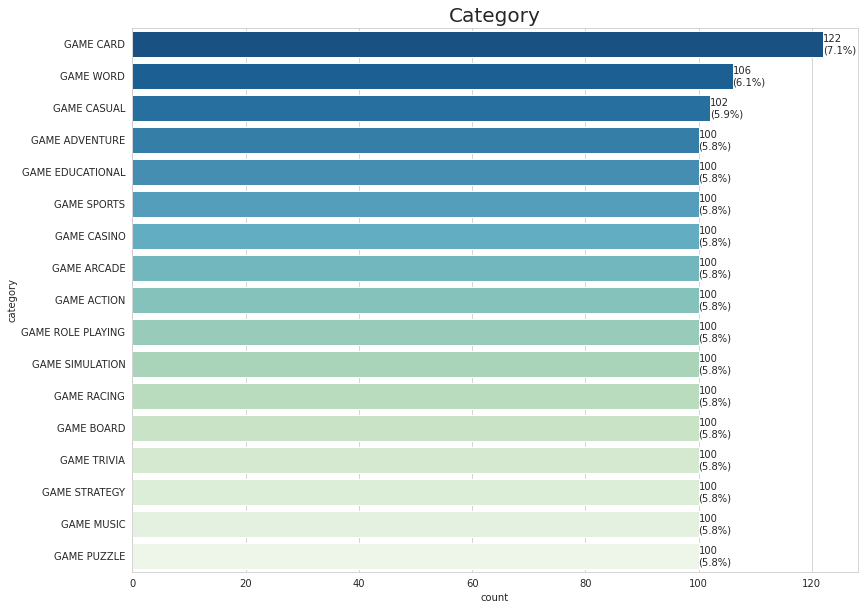

In [9]:
sns.set_style('whitegrid')

plt.figure(figsize= (13,10))

ax= sns.countplot(y= 'category', data= df, order= df['category'].value_counts().index, palette= 'GnBu_r')

plt.title('Category', fontsize= 20)

for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    bot_coord= patch.get_y()
    percent = width/len(df)* 100

    ax.text(left_coord + width, bot_coord + 0.7, '{}\n({:.1f}%)'.format(width, percent))

In [10]:
df['installs'].value_counts()

10.0 M      795
50.0 M      266
5.0 M       248
100.0 M     203
1.0 M       191
500.0 k      13
500.0 M      10
100.0 k       2
1000.0 M      2
Name: installs, dtype: int64

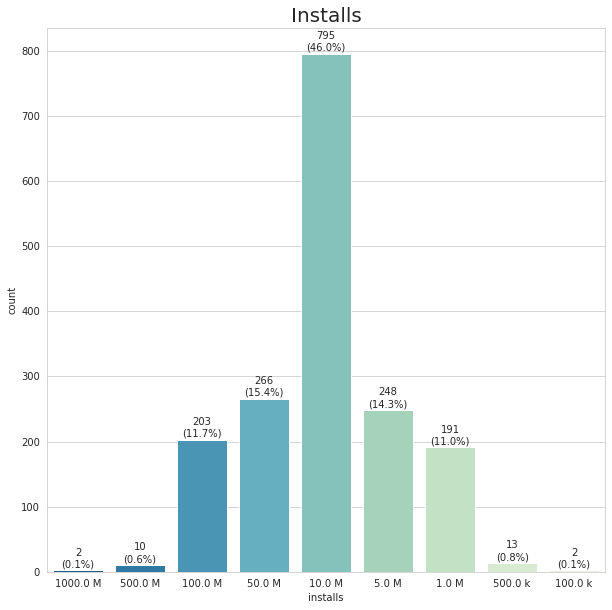

In [11]:
plt.figure(figsize= (10,10))

ax= sns.countplot(x= 'installs', data= df, 
                  order= [ '1000.0 M', '500.0 M', '100.0 M', '50.0 M', '10.0 M', '5.0 M', '1.0 M', '500.0 k', '100.0 k'],
                  palette= 'GnBu_r')

plt.title('Installs', fontsize= 20)

for patch in ax.patches:
    height = patch.get_height()
    width  = patch.get_width()
    left_coord = patch.get_x()
    percent = height/ len(df) * 100

    ax.text(left_coord + width/2, height + 5, '{}\n({:.1f}%)'.format(height, percent), ha= 'center')



In [12]:
df['total ratings']

0       80678661
1       35971961
2       25836869
3       17181659
4       14237554
          ...   
1725      122845
1726      120476
1727      114852
1728      110293
1729      109809
Name: total ratings, Length: 1730, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Garena Free Fire - The Cobra'),
  Text(1, 0, 'Clash of Clans'),
  Text(2, 0, 'PUBG MOBILE: Graffiti Prank'),
  Text(3, 0, 'Subway Surfers'),
  Text(4, 0, 'Candy Crush Saga'),
  Text(5, 0, 'Clash Royale'),
  Text(6, 0, 'Mobile Legends: Bang Bang'),
  Text(7, 0, 'Roblox'),
  Text(8, 0, 'Brawl Stars'),
  Text(9, 0, 'My Talking Tom')])

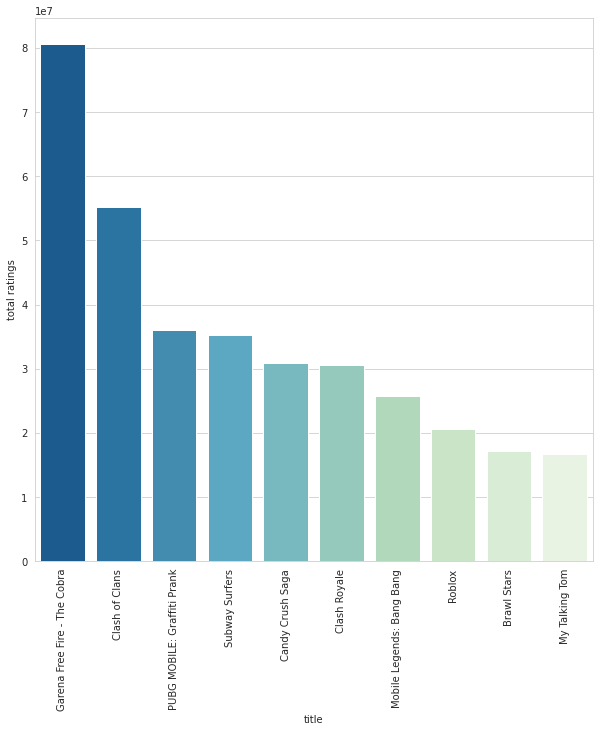

In [13]:
plt.figure(figsize= (10,10))

ax = sns.barplot(x= 'title',y= 'total ratings', data= df, order= df.sort_values('total ratings', ascending= False).head(10).title, palette= 'GnBu_r')
plt.xticks(rotation= 90) 



In [14]:
categoryes = df['category'].unique()


avg_r = []
for cat in categoryes:
    df_cat = df.loc[df['category'] == cat]
    quant = df_cat.shape[0]
    avg = df_cat['average rating'].sum()/quant

    avg_r.append(avg)

data = []
for i in range(len(avg_r)):
    data.append([categoryes[i], avg_r[i]])

df_c = pd.DataFrame(data, columns= ['category', 'average rating'])

df_c = df_c.sort_values('average rating', ascending= False)
    

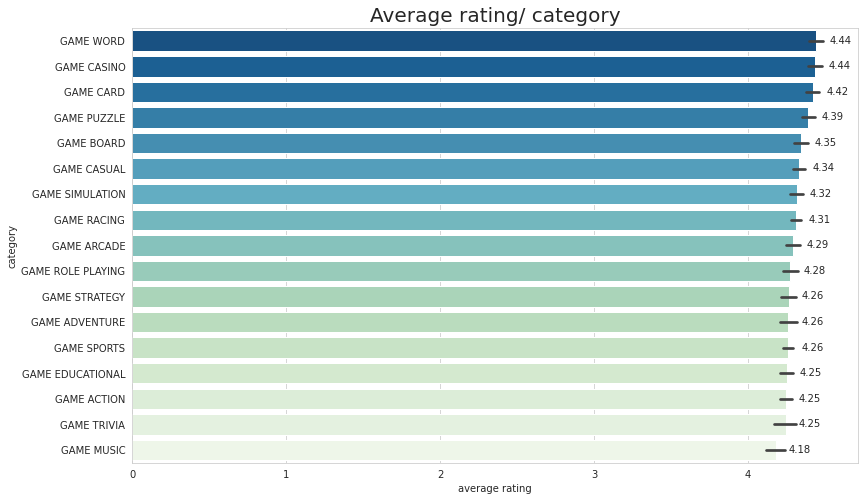

In [15]:
plt.figure(figsize= (13,8))
plt.title('Average rating/ category', fontsize= 20)
ax = sns.barplot(y='category', x= 'average rating', data= df,  palette= 'GnBu_r',order= df_c['category'])

for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    bot_coord = patch.get_y()
    left_coord = patch.get_x()

    ax.text(left_coord+ width * 1.02, bot_coord + 0.5, '{:.2f}'.format(width))

